In [2]:
from IPython.display import Image
import pandas as pd
import numpy as np

### Q1 (15 points) 

#### This question is to be solved by hand.

Given the following learned Bayesian network structure explaining the relationships between variables in container shipping data:

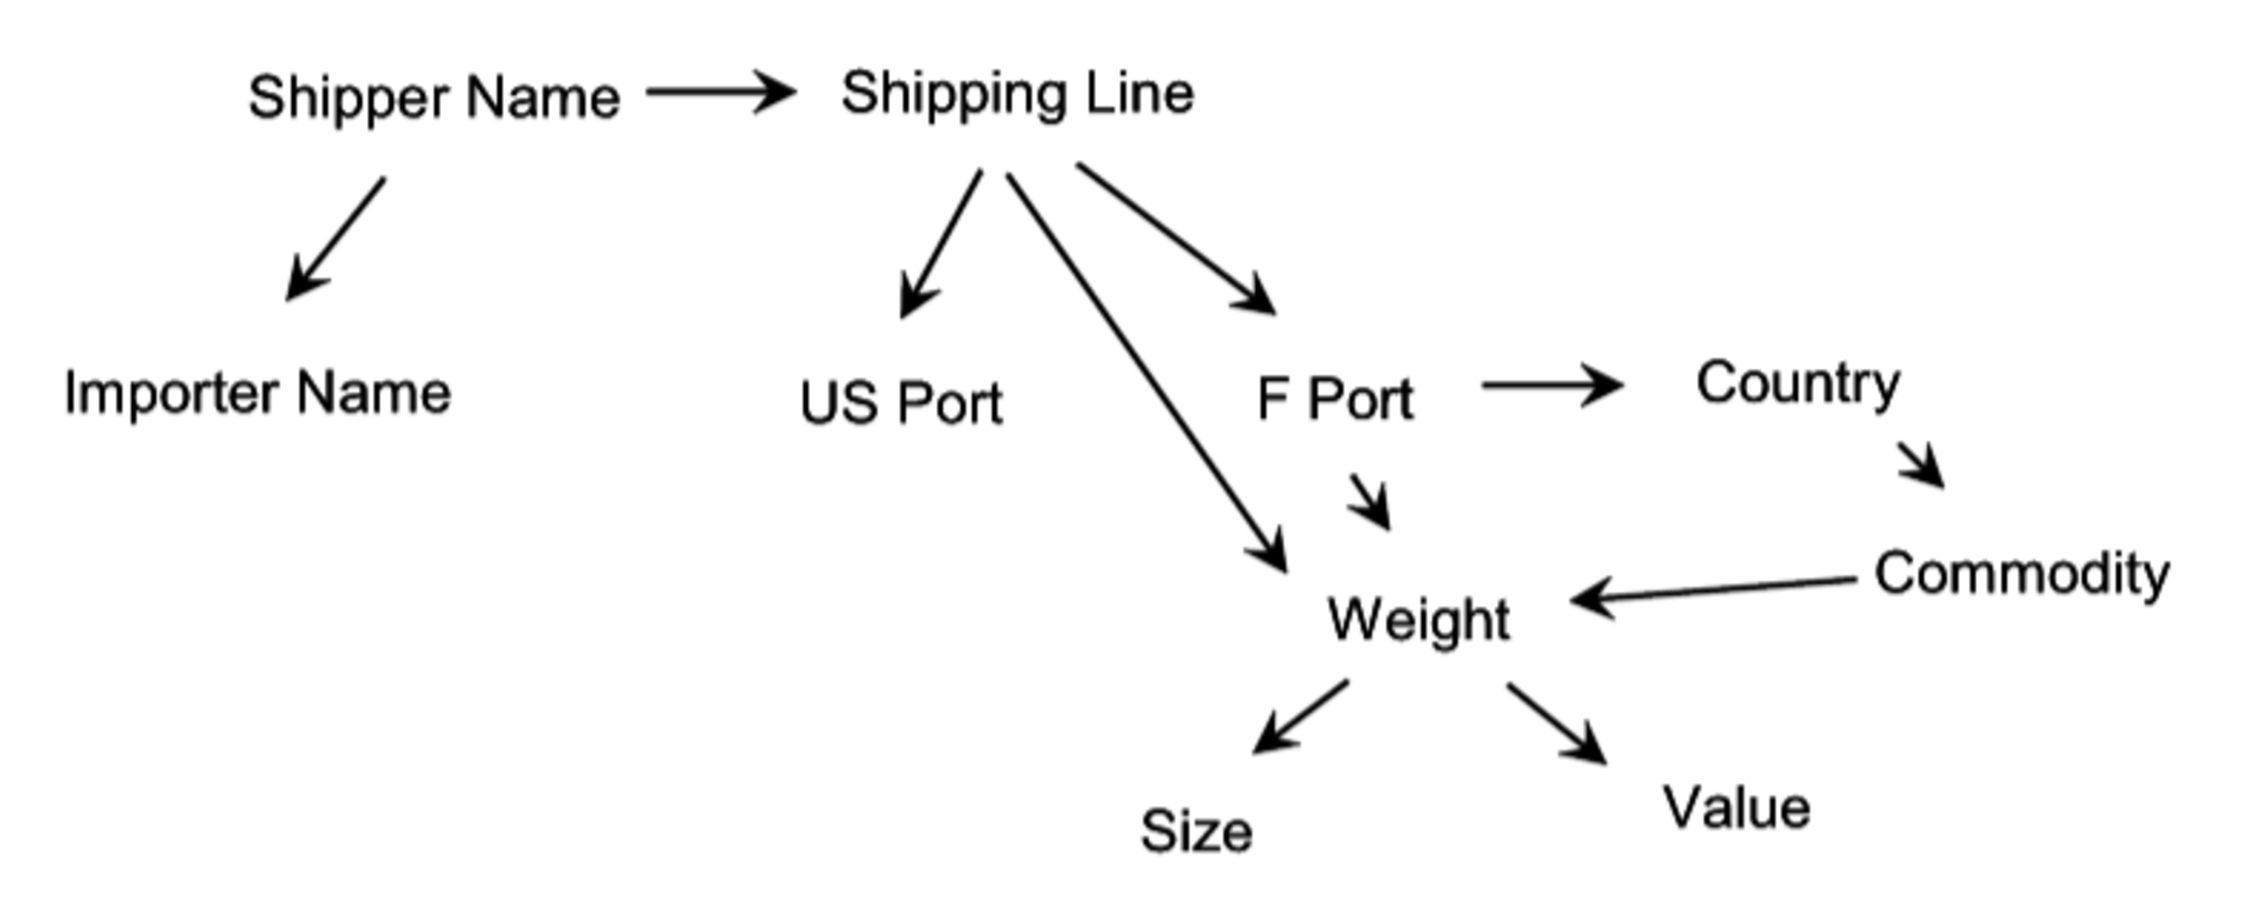

In [2]:
Image('HW3Q1.png')

1) Which of the following conditional independence relationships hold? Choose “Independent” or “Dependent” for each (6 points):

CI (Shipper Name, Value | F Port)?

CI (Shipper Name, Value | Shipping Line)? 

CI (Foreign Port, Commodity | Country)? 

CI (Foreign Port, Commodity | County, Weight)? 

#1. Independent; 
#2. Independent;
#3. Dependent;
#4. Dependent;

2) Now consider a smaller dataset with only four discrete attributes (Shipping Line, US Port, Foreign Port, Weight), and the following conditional probability distributions:

Shipping Line: CSCO (70%), ASCO (30%)

Foreign Port | Shipping Line = CSCO: Yokohama (40%), Vancouver (60%)

Foreign Port | Shipping Line = ASCO: Vancouver (100%)

US Port | Shipping Line = ASCO: Seattle (100%)

US Port | Shipping Line = CSCO: Seattle (80%), Los Angeles (20%)

Weight | Shipping Line = ASCO, Foreign Port = Vancouver: Light (30%), Medium (50%), Heavy (20%)

Weight | Shipping Line = CSCO, Foreign Port = Vancouver: Light (15%), Medium (70%), Heavy (15%)

Weight | Shipping Line = CSCO, Foreign Port = Yokohama: Light (10%), Medium (30%), Heavy (60%)

Which of the following packages is most anomalous?

a) A heavy package shipped from Vancouver to Seattle by ASCO

b) A heavy package shipped from Vancouver to Seattle by CSCO

c) A heavy package shipped from Yokohama to Los Angeles by CSCO

To answer this question, compute the likelihood of each package given the Bayesian Network (lowest likelihood = most anomalous). You must show your calculations to receive credit. (9 points)

(Your answers here, including all calculations)

a.P(Shipping line = ASCO, 
      Foreign Port = Vancouver,
      US Port = Seattle,
      Weight = Heavy) = <br>
      P(Shippig Line = ASCO)
      P(US Port = Seattle|Shippig Line = ASCO)
      P(Foreign Port = Vancouver|Shippig Line = ASCO)
      P(Weight = Heavy|Shipping Line = ASCO, Foreign Port = Vancouver) =
      30% * 100% * 100% * 20% = 6%

b.P(Shipping line = CSCO, 
      Foreign Port = Vancouver,
      US Port = Seattle,
      Weight = Heavy) = <br>
      P(Shippig Line = CSCO)
      P(US Port = Seattle|Shippig Line = CSCO)
      P(Foreign Port = Vancouver|Shippig Line = CSCO)
      P(Weight = Heavy|Shipping Line = CSCO, Foreign Port = Vancouver) =
      70% * 80% * 60% * 15% = 5.04%

c.P(Shipping line = CSCO, 
      Foreign Port = Yokohama,
      US Port = Los Angeles,
      Weight = Heavy) = <br>
      P(Shippig Line = CSCO)
      P(US Port = Los Angeles|Shippig Line = CSCO)
      P(Foreign Port = Yokohama|Shippig Line = CSCO)
      P(Weight = Heavy|Shipping Line = CSCO, Foreign Port = Yokohama) =
      70%* 20%* 40%* 60% = 3.36%

 ##### package c is most anomalous

### Q2. Bayesian Network Learning (35 points)

In this question, we use dataset: "HW3Q2.csv" for Bayesian Network Learning.

In [171]:
from sklearn.model_selection import train_test_split
data2=pd.read_csv("HW3Q2.csv")
train,test=train_test_split(data2,random_state=9,test_size=0.4)
data2.head()

,A,B,C,D,E,F
0,1,0,0,0,1,1
1,2,0,0,1,0,1
2,3,1,0,1,1,1
3,2,0,0,1,1,1
4,1,0,1,0,1,1


a) Use the training data to select the best structure you want to use for Bayesian Network Learning. Please use Hill Climbing with BIC score metric. (10 points)

b) Use the Bayesian Estimator to estimate the CPDs for your model and visualize the network with CPDs. (15 points)

c) Use the model to predict "A" for the testing dataset. Report the out-of-sample prediction accuracy. (10 points)   

In [169]:
import pandas as pd
import numpy as np
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel

In [172]:
# your answers here
# a)
from pgmpy.estimators import HillClimbSearch
hc = HillClimbSearch(data2, scoring_method=BicScore(data2))
best_model = hc.estimate()
print(best_model.edges())

[('B', 'A'), ('D', 'A'), ('F', 'A')]


In [173]:
# b)
from pgmpy.estimators import BayesianEstimator
best_model.fit(train, estimator=BayesianEstimator, prior_type='K2')
for cpd in best_model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)

CPD of A:
+------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+
| B    | B(0)             | B(0)             | B(0)             | B(0)             | B(1)            | B(1)             | B(1)             | B(1)             |
+------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+
| D    | D(0)             | D(0)             | D(1)             | D(1)             | D(0)            | D(0)             | D(1)             | D(1)             |
+------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+
| F    | F(0)             | F(1)             | F(0)             | F(1)             | F(0)            | F(1)             | F(0)             | F(1)             |
+------+------------------+---

In [177]:
# c)
predicted_test = best_model.predict(test[["B","D","F"]])
print "Out-of-sample Accuracy: ", (test.loc[:, "A"]==predicted_test["A"]).mean()

Out-of-sample Accuracy:  0.5065


### Q3. Clustering: Spatial and Temporal Distributions of Chicago Crimes (50 points)

In this question you will use k-means and Gaussian mixture clustering in sklearn and hierarchical clustering in scipy to answer the question, “Do different types of crime display different trends over space and time?”  The dataset “HW3Q3_1.csv” consists of data for 119 different types of crime, each of which occurred at least 100 times in Chicago during the year 2016.  For each crime type, we have various features representing the spatial and temporal distribution of crime, including:

- The proportion of all crimes of that type that occurred on each day of the week (day_Sun, day_Mon, …, day_Sat).

- The proportion of all crimes of that type that occurred on each hour of the day (hour_0 = midnight to 12:59am, hour_1 = 1am to 1:59am, …, hour_23 = 11pm to 11:59pm).

- The proportion of all crime of that type that occurred in each of the 77 community areas of Chicago (community_area_1 … community_area_77).

We also have, for each crime type, its categorization by the FBI:

- Category = “P1V” corresponds to Part 1 Violent Crime, i.e., serious violent crimes

- Category = “P1P” corresponds to Part 1 Property Crime, i.e., serious property crimes

- Category = “P2” corresponds to Part 2 (less serious) crimes.

To answer parts a through f, you should cluster the 119 crime types using k-means into k = 3 clusters using only the hour of day (hour_0..hour_23) attributes.

a) Copy each cluster’s mean values for hour_0…hour_23 into a DataFrame and create a line graph to visualize these values by cluster.  (5 pts)

b) Describe the three different hour-of-day trends represented by these three clusters (5 pts).

c) Do you notice any consistent trends about which crime types are assigned to which cluster?  Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories. (5 pts)  

d) Do the three clusters have different day-of-week trends?  Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences.  (5 pts)

e) Do the three clusters affect different types of communities/neighborhoods?  To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster.  You can then use the provided file (HW3Q3_2.csv), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.).  You may also wish to consult the Chicago Community Areas map at https://en.wikipedia.org/wiki/Community_areas_in_Chicago. (5 pts)

f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes? (5 pts)

g) For part g, you will use the same dataset to compare the clusters produced by several different methods.  But this time you should cluster using only the _day-of-week_ (not hour-of-day) attributes (day_Sun..day_Sat).  Please perform four different clusterings using (i) k-means, (ii) Gaussian mixture models, (iii) Bottom-up hierarchical clustering with "single link" distance metric, and (iv) Bottom-up hierarchical clustering with "complete link" distance metric.  In each case, you should choose the number of clusters using the silhouette method (or another established method of your choice- please specify).  For each clustering, report the number of clusters formed and the number of elements in each cluster. You should also identify any notable similarities or differences between the clusterings. (20 pts)


In [1]:
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans

In [3]:
data3=pd.read_csv("HW3Q3_1.csv")
data3.head()

,crime_type,Category,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,hour_0,...,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77
0,ARSON: BY FIRE,P1P,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0.073654,...,0.019830,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,P2,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0.055556,...,0.037037,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407
2,ASSAULT: AGGRAVATED: HANDGUN,P1V,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0.040630,...,0.035377,0.031524,0.013310,0.042732,0.002102,0.017863,0.000000,0.012259,0.002102,0.003152
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,P1V,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,0.034000,...,0.028000,0.030000,0.014000,0.037000,0.003000,0.010000,0.002000,0.002000,0.003000,0.006000
4,ASSAULT: AGGRAVATED: OTHER FIREARM,P1V,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,0.009804,...,0.029412,0.019608,0.009804,0.019608,0.000000,0.000000,0.000000,0.009804,0.000000,0.000000


In [4]:
data4=pd.read_csv("HW3Q3_2.csv")
data4.head()

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
0,1,Rogers Park,1164399.219,1947666.815,7.7,23.6,8.7,18.2,27.5,23939,11.870556,3420
1,2,West Ridge,1158307.200,1943243.722,7.8,17.2,8.8,20.8,38.5,23040,9.870385,3068
2,3,Uptown,1168228.082,1930980.022,3.8,24.0,8.9,11.8,22.2,35787,8.672137,3330
3,4,Lincoln Square,1159618.804,1933105.743,3.4,10.9,8.2,13.4,25.5,37524,8.600422,1859
4,5,North Center,1161104.228,1924056.010,0.3,7.5,5.2,4.5,26.2,57123,10.100636,1280


In [5]:
X = data3.iloc[:, 9:33]
X.head()

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.073654,0.079320,0.076487,0.087819,0.082153,0.073654,0.039660,0.033994,0.014164,0.016997,...,0.019830,0.019830,0.025496,0.022663,0.022663,0.053824,0.033994,0.033994,0.042493,0.062323
1,0.055556,0.070370,0.033333,0.014815,0.025926,0.003704,0.007407,0.014815,0.018519,0.029630,...,0.055556,0.077778,0.048148,0.059259,0.044444,0.044444,0.077778,0.044444,0.074074,0.044444
2,0.040630,0.039580,0.033275,0.036778,0.018564,0.014011,0.012609,0.021366,0.025569,0.034676,...,0.055342,0.052189,0.059895,0.056392,0.062347,0.051839,0.053240,0.066550,0.055692,0.056042
3,0.034000,0.026000,0.018000,0.009000,0.010000,0.015000,0.020000,0.017000,0.033000,0.036000,...,0.045000,0.058000,0.073000,0.078000,0.068000,0.066000,0.059000,0.038000,0.051000,0.041000
4,0.009804,0.009804,0.029412,0.009804,0.009804,0.019608,0.039216,0.019608,0.000000,0.029412,...,0.029412,0.009804,0.107843,0.117647,0.058824,0.068627,0.078431,0.068627,0.049020,0.088235


In [6]:
# your answers here
# a).
n = 3
dd = X
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)
print(res.labels_)

[0 0 0 2 0 0 1 2 0 2 0 0 0 0 2 0 0 0 0 1 0 0 2 0 2 0 0 0 0 0 0 0 2 2 2 0 1
 1 1 2 2 1 1 1 1 1 0 2 2 0 2 0 0 0 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 2 2 0
 2 2 2 2 2 2 1 2 2 2 0 2 2 1 2 2 2 2 0 1 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2
 2 2 2 2 0 0 0 2]


In [7]:
print '\nCluster centers:\n', res.cluster_centers_


Cluster centers:
[[ 0.05840987  0.04580745  0.04181406  0.03534788  0.0278477   0.01976771
   0.01897923  0.02140953  0.02360549  0.02854409  0.03257074  0.03249082
   0.03767692  0.03605063  0.03884339  0.04298892  0.04798357  0.05008376
   0.05430729  0.05686858  0.06361811  0.06098036  0.06691756  0.05708634]
 [ 0.05563878  0.00805128  0.0072664   0.00583933  0.00772808  0.00567655
   0.01240302  0.02160172  0.05628499  0.13194288  0.09270737  0.06097824
   0.11056231  0.06977804  0.06070717  0.0684495   0.0572244   0.04125397
   0.03504829  0.02707726  0.02477384  0.01693122  0.01110543  0.01096991]
 [ 0.03061337  0.01950498  0.01475302  0.01095523  0.00890795  0.00797363
   0.01187982  0.02081174  0.0298491   0.04022295  0.0564243   0.06590235
   0.06126449  0.0556566   0.0581785   0.05582088  0.05392813  0.05609529
   0.06881789  0.0769488   0.06216223  0.05269899  0.0460705   0.03455926]]


In [8]:
cluster_center = pd.DataFrame(res.cluster_centers_)
cluster_center

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.058410,0.045807,0.041814,0.035348,0.027848,0.019768,0.018979,0.021410,0.023605,0.028544,...,0.038843,0.042989,0.047984,0.050084,0.054307,0.056869,0.063618,0.060980,0.066918,0.057086
1,0.055639,0.008051,0.007266,0.005839,0.007728,0.005677,0.012403,0.021602,0.056285,0.131943,...,0.060707,0.068450,0.057224,0.041254,0.035048,0.027077,0.024774,0.016931,0.011105,0.010970
2,0.030613,0.019505,0.014753,0.010955,0.008908,0.007974,0.011880,0.020812,0.029849,0.040223,...,0.058178,0.055821,0.053928,0.056095,0.068818,0.076949,0.062162,0.052699,0.046070,0.034559


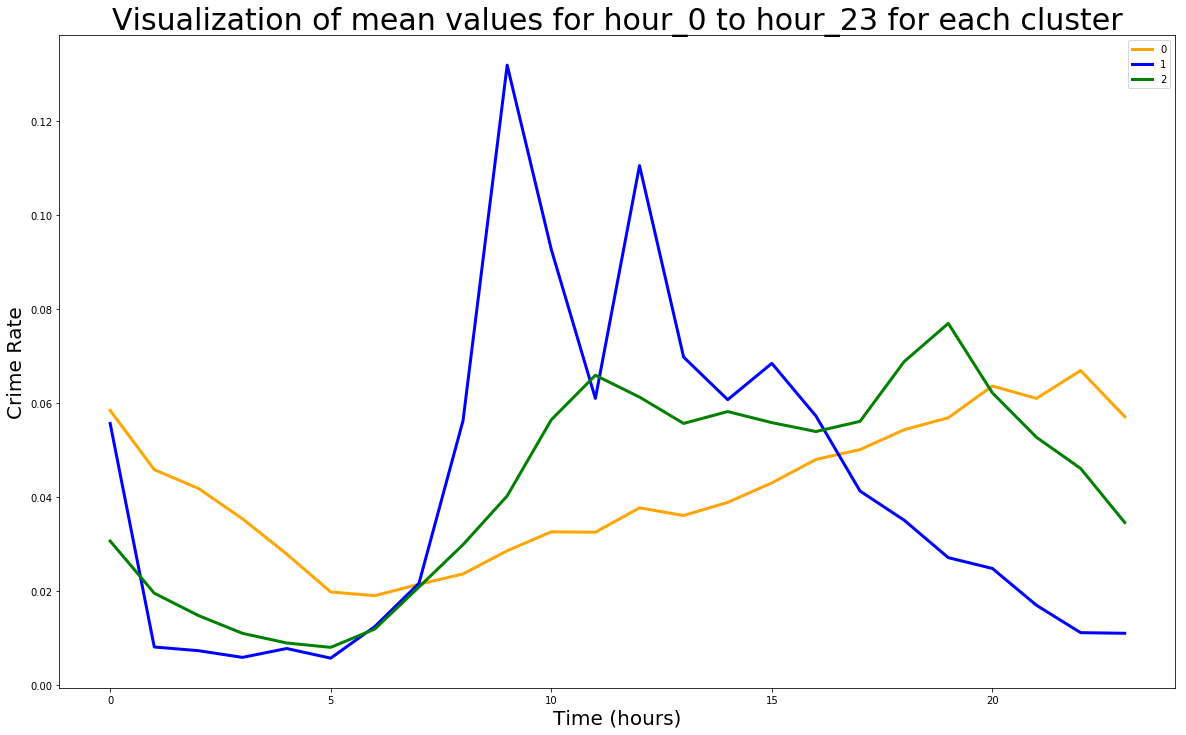

In [9]:
# plotting the mean values for each cluster
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(1,1,1)
L1 = ax.plot(cluster_center.iloc[0,:],lw=3.0,color='Orange')
L2 = ax.plot(cluster_center.iloc[1,:],lw=3.0,color="Blue")
L3 = ax.plot(cluster_center.iloc[2,:],lw=3.0,color="Green")
ax.set_title("Visualization of mean values for hour_0 to hour_23 for each cluster", fontsize = "30")
ax.set_xlabel("Time (hours)", fontsize = 20)
ax.set_ylabel("Crime Rate", fontsize = 20)
ax.legend()
plt.show()

Three different hour-of-day trends represented by these three clusters
All three categories hit their nadirs at around 5 am. Category 0 continues to grow after 5 am and steadily climb to its climax at 23 pm, then it decreases significantly during late night (0 - 5 am).

Category 1 surges to its global maximum between 9-10 am and then drops dramatically before the second peak comes at around 12 pm. It continues to decline in the afternoon and in the evening, followed by a third local maximum at 12 am. After all these drastic fluctuations during a day, it remains at its lowest level between 1 am to 5 am. 

Category 2 reaches its first peak at 11 am then stays relatively stable till around 17 pm before it rise up again and reach the maximum at 18 pm. Finally it experiences a smooth decline from 18 pm to next-day 5 am. 

In [159]:
#c).any consistent trends about which crime types are assigned to which cluster
type_n_label = pd.DataFrame(data3['crime_type'])
type_n_label["Label"] = res.labels_
type_n_label = type_n_label.sort_values(['Label'], ascending=[True])
type_n_label.head()

,crime_type,Label
0,ARSON: BY FIRE,0
31,CRIMINAL DAMAGE: TO VEHICLE,0
73,OFFENSE INVOLVING CHILDREN: ENDANGERING LIFE/H...,0
107,STALKING: SIMPLE,0
46,DECEPTIVE PRACTICE: THEFT OF LABOR/SERVICES,0


In [165]:
L0 = type_n_label[type_n_label['Label']==0]
L0['type'] = L0['crime_type'].str.split(':').str[0]
L0.groupby('type').count()

D:\ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,crime_type,Label
type,,
ARSON,1,1
ASSAULT,4,4
BATTERY,10,10
BURGLARY,2,2
CRIM SEXUAL ASSAULT,2,2
CRIMINAL DAMAGE,5,5
CRIMINAL TRESPASS,1,1
DECEPTIVE PRACTICE,1,1
HOMICIDE,1,1


In [166]:
L1 = type_n_label[type_n_label['Label']==1]
L1['type'] = L1['crime_type'].str.split(':').str[0]
L1.groupby('type').count()

D:\ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,crime_type,Label
type,,
ASSAULT,1,1
BATTERY,1,1
DECEPTIVE PRACTICE,8,8
OTHER OFFENSE,2,2
PUBLIC PEACE VIOLATION,1,1


In [167]:
L2 = type_n_label[type_n_label['Label']==2]
L2['type'] = L2['crime_type'].str.split(':').str[0]
L2.groupby('type').count()

D:\ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,crime_type,Label
type,,
ASSAULT,2,2
BATTERY,2,2
BURGLARY,2,2
CRIMINAL TRESPASS,3,3
DECEPTIVE PRACTICE,3,3
GAMBLING,1,1
INTERFERENCE WITH PUBLIC OFFICER,1,1
NARCOTICS,12,12
OFFENSE INVOLVING CHILDREN,3,3


From the three tables above we can observe that for label 0 crime type Battery and Robbery have the highest frequencies.
For label 1, deceptive practices have the highest frequencies. For label 2, other offences and interference with public officer have the highest frequencies.

In [112]:
#d). 
X2 = data3.iloc[:, 2:9]
X2.head()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat
0,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972
1,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185
2,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776
3,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000
4,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275


In [12]:
X2["Label"] = res.labels_
X2.head()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,Label
0,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0
1,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0
2,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0
3,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,2
4,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,0


In [13]:
# calculating the mean values for each cluster
mean_0 = X2[X2.Label == 0].mean()
mean_1 = X2[X2.Label == 1].mean()
mean_2 = X2[X2.Label == 2].mean()

In [14]:
d = {'Cluster_one':mean_0,'Cluster_two':mean_1, 'Cluster_three':mean_2}
week_trends = pd.DataFrame(d)
week_trends.drop(week_trends.tail(1).index,inplace=True)

In [15]:
week_trends

,Cluster_one,Cluster_three,Cluster_two
day_Sun,0.150886,0.126694,0.078582
day_Mon,0.133700,0.148161,0.158511
day_Tue,0.137165,0.149006,0.167456
day_Wed,0.134891,0.141457,0.172347
day_Thu,0.134649,0.146310,0.158838
day_Fri,0.150685,0.153289,0.162397
day_Sat,0.158025,0.135084,0.101868


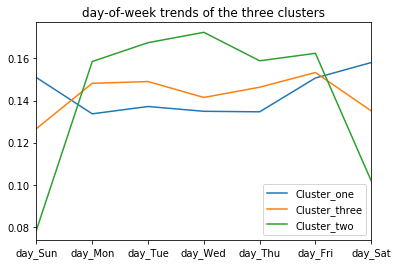

In [16]:
week_trends.plot(title = "day-of-week trends of the three clusters")
plt.show()

Difference in day-of-week trends:
Category 1 (label 0) remains low from Monday to Thursday and grows higher during weekends.
Category 2 (label 1) is very high during weekdays but drops dramatically on Saturdays and Sundays. 
Category 3 (label 2) has similar fluctuation structure to that of category 2 but the difference between weekend level and weekday level are not very strong. 

In [79]:
#e). 
X3 = data3.iloc[:, 33:110]
X3.head()

,community_area_1,community_area_2,community_area_3,community_area_4,community_area_5,community_area_6,community_area_7,community_area_8,community_area_9,community_area_10,...,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77
0,0.005666,0.008499,0.002833,0.000000,0.000000,0.005666,0.011331,0.002833,0.000,0.000000,...,0.019830,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833
1,0.014815,0.011111,0.014815,0.003704,0.003704,0.018519,0.003704,0.011111,0.000,0.007407,...,0.037037,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407
2,0.009107,0.009457,0.006655,0.003152,0.002102,0.003152,0.001751,0.010158,0.000,0.002102,...,0.035377,0.031524,0.013310,0.042732,0.002102,0.017863,0.000000,0.012259,0.002102,0.003152
3,0.014000,0.011000,0.014000,0.003000,0.006000,0.012000,0.004000,0.021000,0.001,0.002000,...,0.028000,0.030000,0.014000,0.037000,0.003000,0.010000,0.002000,0.002000,0.003000,0.006000
4,0.000000,0.009804,0.000000,0.009804,0.009804,0.019608,0.000000,0.000000,0.000,0.009804,...,0.029412,0.019608,0.009804,0.019608,0.000000,0.000000,0.000000,0.009804,0.000000,0.000000


In [80]:
X3["Label"] = res.labels_
X3.head()

,community_area_1,community_area_2,community_area_3,community_area_4,community_area_5,community_area_6,community_area_7,community_area_8,community_area_9,community_area_10,...,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77,Label
0,0.005666,0.008499,0.002833,0.000000,0.000000,0.005666,0.011331,0.002833,0.000,0.000000,...,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833,0
1,0.014815,0.011111,0.014815,0.003704,0.003704,0.018519,0.003704,0.011111,0.000,0.007407,...,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407,0
2,0.009107,0.009457,0.006655,0.003152,0.002102,0.003152,0.001751,0.010158,0.000,0.002102,...,0.031524,0.013310,0.042732,0.002102,0.017863,0.000000,0.012259,0.002102,0.003152,0
3,0.014000,0.011000,0.014000,0.003000,0.006000,0.012000,0.004000,0.021000,0.001,0.002000,...,0.030000,0.014000,0.037000,0.003000,0.010000,0.002000,0.002000,0.003000,0.006000,2
4,0.000000,0.009804,0.000000,0.009804,0.009804,0.019608,0.000000,0.000000,0.000,0.009804,...,0.019608,0.009804,0.019608,0.000000,0.000000,0.000000,0.009804,0.000000,0.000000,0


In [81]:
# calculating the mean values for each cluster
com_mean_0 = X3[X3.Label == 0].mean()
com_mean_1 = X3[X3.Label == 1].mean()
com_mean_2 = X3[X3.Label == 2].mean()

In [90]:
d2 = {'Cluster_one':com_mean_0, 'Cluster_two':com_mean_1, 'Cluster_three':com_mean_2,}
com_areas = pd.DataFrame(d2)
com_areas.drop(com_areas.tail(1).index,inplace=True)
com_areas

,Cluster_one,Cluster_three,Cluster_two
community_area_1,0.013562,0.012591,0.012528
community_area_2,0.012788,0.010208,0.013536
community_area_3,0.012691,0.012409,0.017650
community_area_4,0.006845,0.006358,0.011505
community_area_5,0.004130,0.002986,0.010555
community_area_6,0.018801,0.016960,0.028760
community_area_7,0.008871,0.009671,0.019447
community_area_8,0.024736,0.031548,0.054875
community_area_9,0.000582,0.000990,0.002423
community_area_10,0.003383,0.003776,0.008024


In [152]:
data4[(data4['Community Area Number']<34) & (data4['Community Area Number']>22)]

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
22,23,Humboldt park,1151216.159,1906926.141,14.8,33.9,17.3,35.4,38.0,13781,15.839488,7522
23,24,West Town,1163041.478,1907678.393,2.3,14.7,6.6,12.9,21.7,43198,8.734616,7754
24,25,Austin,1140839.462,1903174.321,6.3,28.6,22.6,24.4,37.9,15957,14.188517,15719
25,26,West Garfield Park,1148754.852,1898785.758,9.4,41.7,25.8,24.5,43.6,10934,27.504936,5340
26,27,East Garfield Park,1155086.641,1898653.301,8.2,42.4,19.6,21.3,43.2,12961,19.899589,4727
27,28,Near West Side,1167030.371,1898359.955,3.8,20.6,10.7,9.6,22.2,44689,11.790159,8891
28,29,North Lawndale,1152306.328,1892568.863,7.4,43.1,21.2,27.6,42.7,12034,21.888178,8073
29,30,South Lawndale,1153804.007,1886910.848,15.2,30.7,15.8,54.8,33.8,10402,14.103657,4460
30,31,Lower West Side,1164977.780,1890104.878,9.6,25.8,15.8,40.7,32.6,16444,13.394837,2455
31,32,Loop,1176373.765,1899831.267,1.5,14.7,5.7,3.1,13.5,65526,24.629080,8471


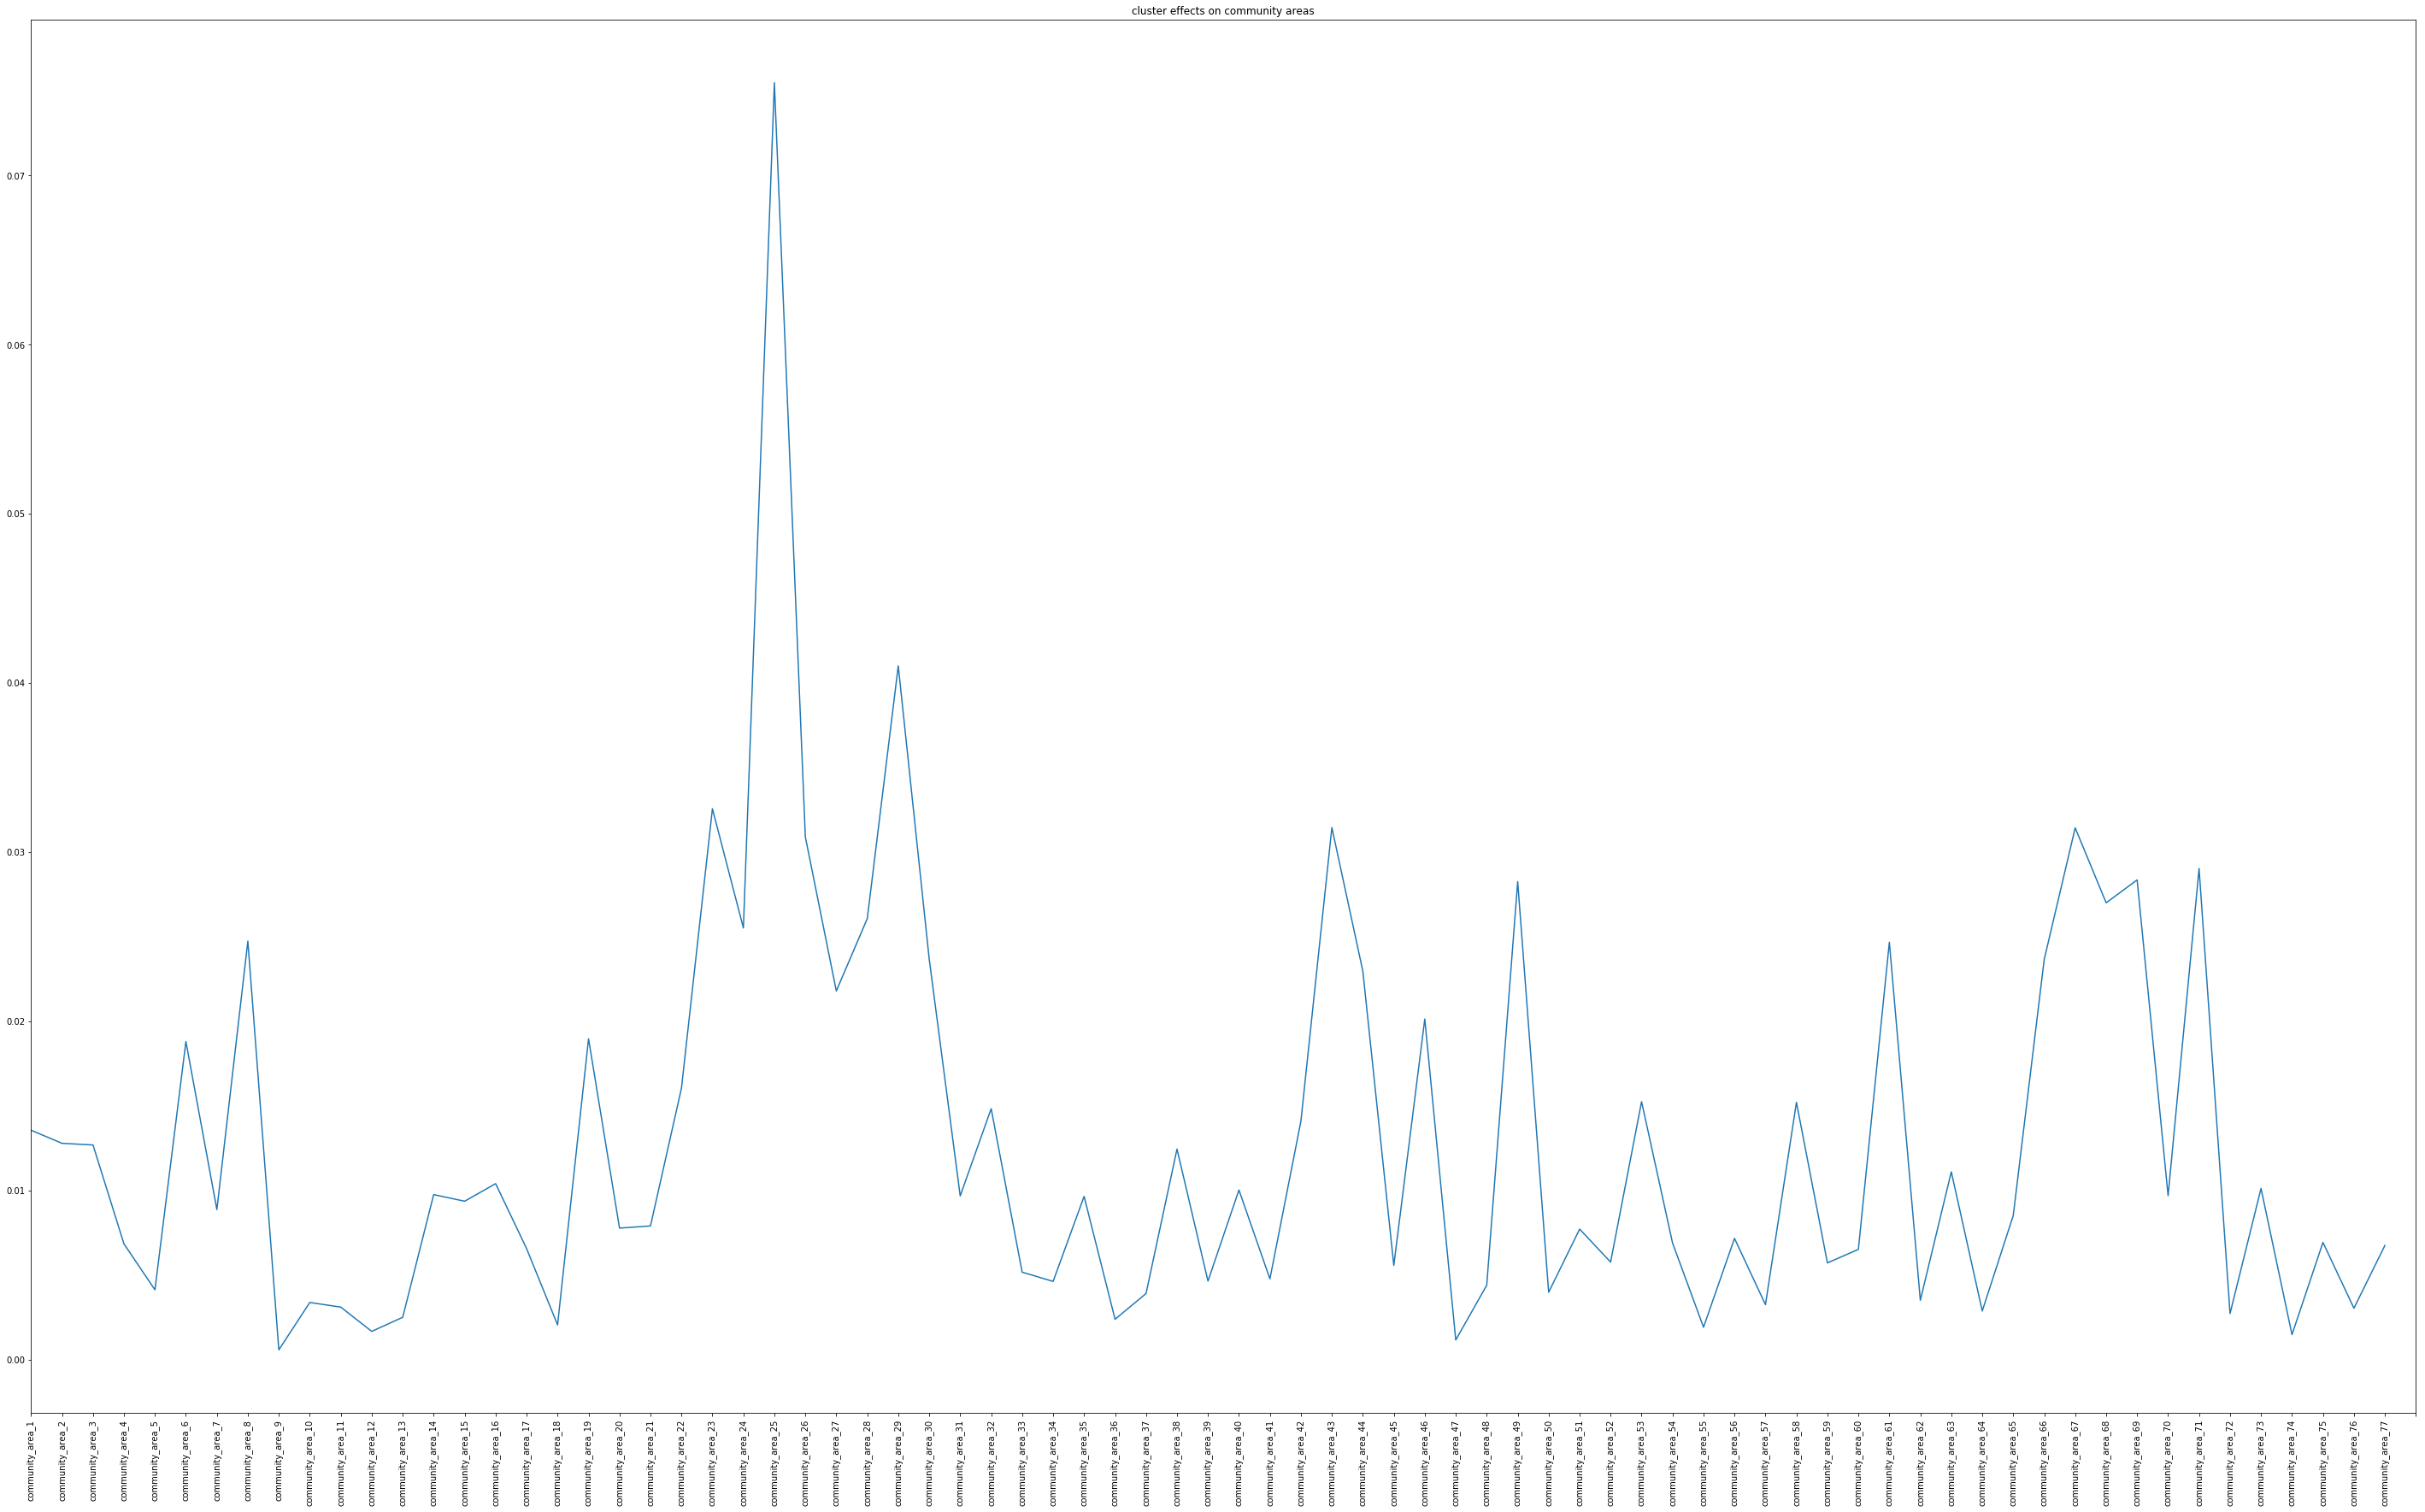

In [101]:
# plot for cluster one
com_areas.iloc[:,0].plot(figsize = (50, 30), xticks = range(78), title = "cluster effects on community areas")
plt.xticks(rotation=90)
plt.show()

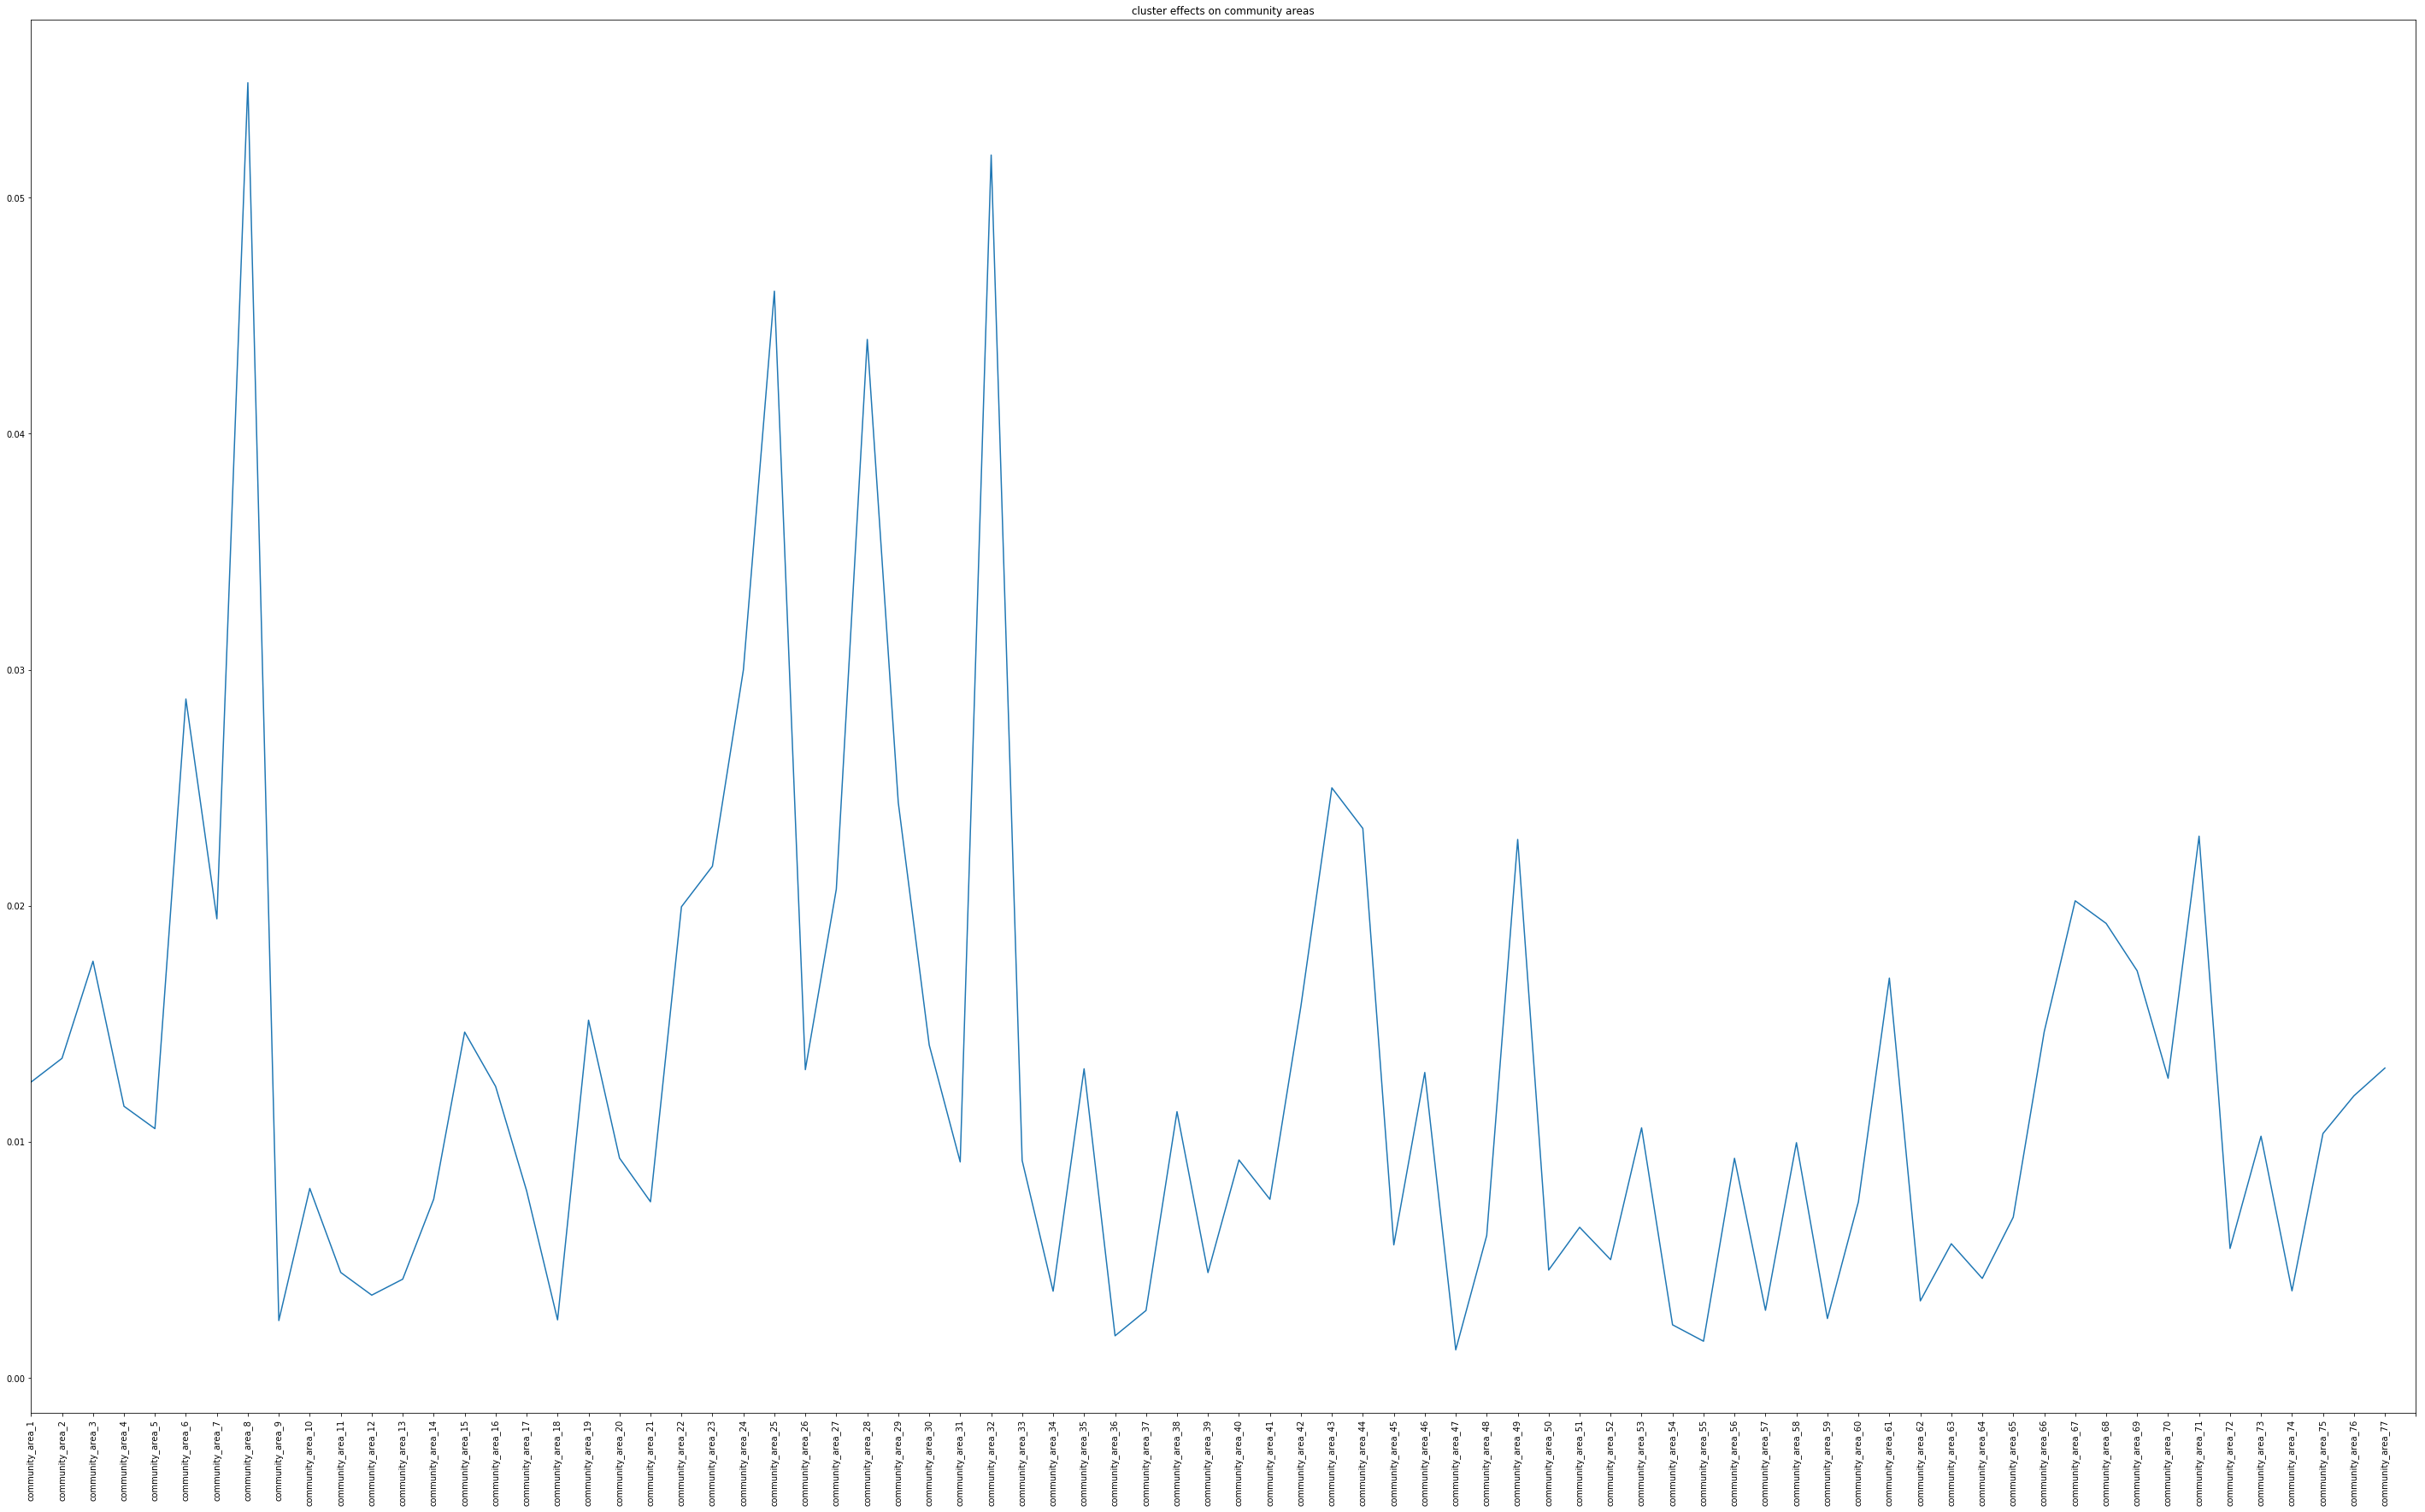

In [102]:
# plot for cluster two
com_areas.iloc[:,2].plot(figsize = (50, 30), xticks = range(78), title = "cluster effects on community areas")
plt.xticks(rotation=90)
plt.show()

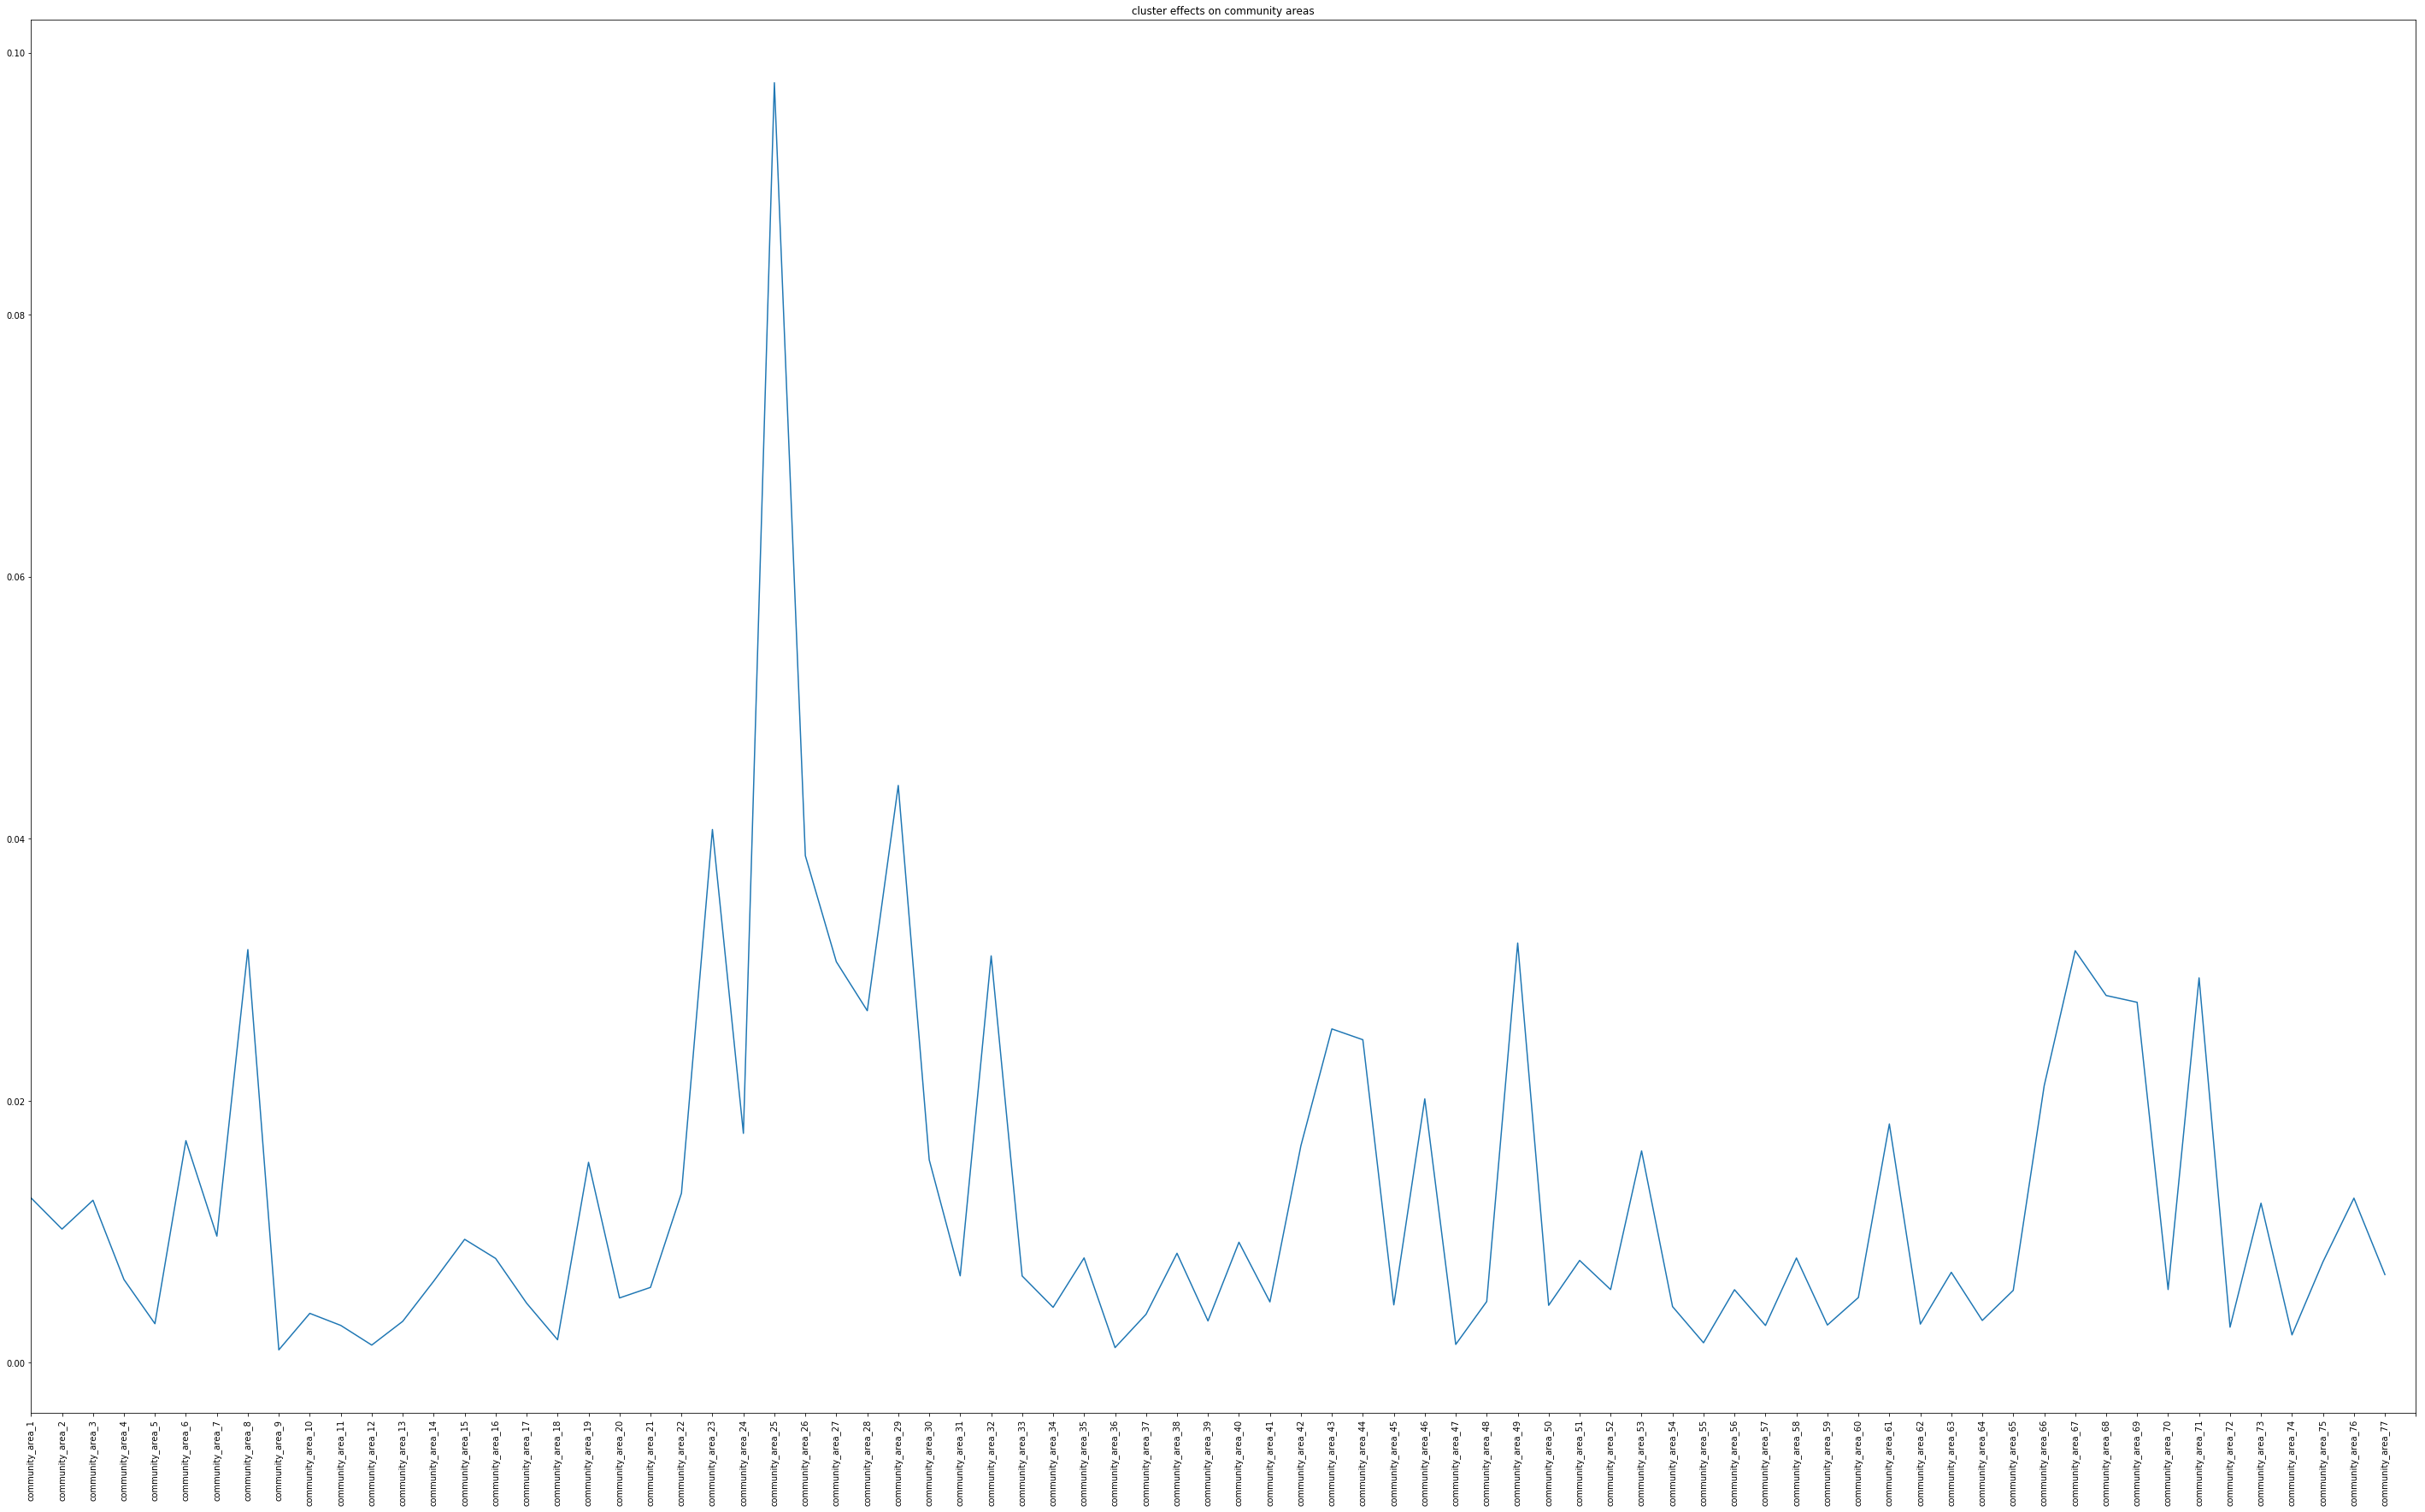

In [103]:
# plot for cluster three
com_areas.iloc[:,1].plot(figsize = (50, 30), xticks = range(78), title = "cluster effects on community areas")
plt.xticks(rotation=90)
plt.show()

From the three plots we can observe that for all three clusters, generally speaking, community areas 23 to 33 forms a block that has prominently high values compared to other community areas. Referring to the socio-economic factors presented in data4, these community areas (especially 26, 27 and 29) have porer performance comparing to other areas, i.e., higher unemployment rate, higher percentage of poverty, lower education level, and lower income level, etc. In addition, the Chicago Community Areas map shows that these community areas are spatially aggregated in the West Side area. This spatial consistency may lead to a clustering effect of crime commitment. 

In [17]:
#f). 
comparison = pd.DataFrame(data3[['Category']])
comparison["Label"] = res.labels_
comparison

,Category,Label
0,P1P,0
1,P2,0
2,P1V,0
3,P1V,2
4,P1V,0
5,P1V,0
6,P2,1
7,P2,2
8,P2,0
9,P2,2


In [39]:
PIP = comparison[comparison['Category']=='P1P'].groupby("Label").count()
PIP = PIP.reset_index()
PIP.columns = ['Label','PIP']
PIP

,Label,PIP
0,0,6
1,2,9


In [33]:
P2 = comparison[comparison['Category']=='P2'].groupby("Label").count()
P2 = P2.reset_index()
P2.columns = ['Label','P2']
P2

,Label,P2
0,0,25
1,1,13
2,2,42


In [47]:
P1V = comparison[comparison['Category']=='P1V'].groupby("Label").count()
P1V = P1V.reset_index()
P1V.columns = ['Label', 'P1V']
P1V

,Label,P1V
0,0,22
1,2,2


In [48]:
P1V['PIP'] = PIP.PIP
df2 = pd.DataFrame([[1,0,0]], columns=['Label', 'P1V', 'PIP'])
P1V = P1V.append(df2)
P1V = P1V.sort_values("Label")
P1V

,Label,P1V,PIP
0,0,22,6
0,1,0,0
1,2,2,9


In [54]:
P1V = P1V.reset_index()
P1V['P2'] = P2.P2
P1V

,index,Label,P1V,PIP,P2
0,0,0,22,6,25
1,0,1,0,0,13
2,1,2,2,9,42


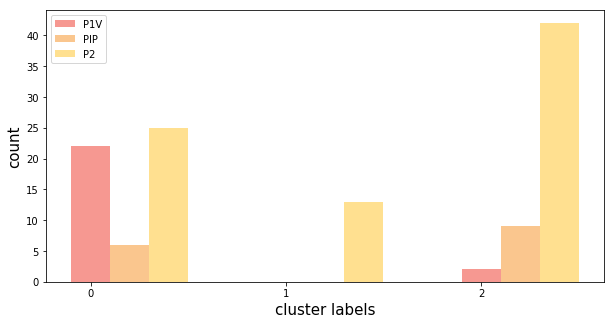

In [76]:
# grouped bar plot
pos = list(range(len(P1V['Label']))) 
width = 0.20
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos, 
        #using df['pre_score'] data,
        P1V['P1V'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        label=P1V['Label'][0]) 

plt.bar([p + width for p in pos], 
        #using df['pre_score'] data,
        P1V['PIP'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        label=P1V['Label'][1])

plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        P1V['P2'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        label=P1V['Label'][2]) 

ax.set_xticks(pos)
ax.set_xlabel("cluster labels", fontsize = 15)
ax.set_ylabel("count", fontsize = 15)
plt.legend(['P1V', 'PIP', 'P2'], loc='upper left')

plt.show()

It seems that there is no perfect correlation between FBI’s division labels and the cluster labels. P1V most explicitly corresponds to category 0. The proportion of P2 is the highest in category 2, but the other two categories combined also account for more than half of P2. There is no obvious biased distribution of PIP across the three categories.

In [113]:
# g)
X2.head()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat
0,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972
1,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185
2,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776
3,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000
4,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275


In [114]:
X2 = X2.iloc[:,0:7]
X2.head()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat
0,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972
1,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185
2,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776
3,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000
4,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275


In [116]:
from sklearn.metrics import silhouette_score
# KMeans clustering
range_n_clusters = range(2,10)

dd = X2

for i in range_n_clusters:
    n = i
    km=KMeans(random_state=324,n_clusters=n)
    res2 = km.fit(dd)
    silhouette_avg = silhouette_score(dd, res2.labels_)
    print("For n_clusters = {},".format(i)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.234967039802
For n_clusters = 3, the average silhouette_score is : 0.232859305226
For n_clusters = 4, the average silhouette_score is : 0.210690671645
For n_clusters = 5, the average silhouette_score is : 0.153223514174
For n_clusters = 6, the average silhouette_score is : 0.170242880032
For n_clusters = 7, the average silhouette_score is : 0.173353484564
For n_clusters = 8, the average silhouette_score is : 0.184212008422
For n_clusters = 9, the average silhouette_score is : 0.137644013416


In [121]:
print "for KMeans cluster, k = 2 is the optimal solution of No. of clusters."

n = 2
dd = X2
km=KMeans(random_state=324,n_clusters=n)
res2 = km.fit(dd)
print "\n the labels are as follows: "
res2.labels_

for KMeans cluster, k = 2 is the optimal solution of No. of clusters.

 the labels are as follows: 


array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1])

In [122]:
# reporting the the number of elements in each cluster for kmeans clustering 
element_kmeans = pd.DataFrame(data3['crime_type'])
element_kmeans["Label"] = res2.labels_
element_kmeans = element_kmeans.sort_values(['Label'], ascending=[True])
element_kmeans.groupby("Label").count()

,crime_type
Label,
0,56
1,63


In [128]:
# Gaussian Mixure Model
from sklearn.mixture import GaussianMixture

for i in range_n_clusters:
    gmm = GaussianMixture(n_components=i,random_state=100)
    res3 = gmm.fit(dd)
    labels = res3.predict(dd)
    silhouette_avg = silhouette_score(dd, labels)
    print("For n_clusters = {},".format(i)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.25672726757
For n_clusters = 3, the average silhouette_score is : 0.220138318719
For n_clusters = 4, the average silhouette_score is : 0.227039527208
For n_clusters = 5, the average silhouette_score is : 0.228181354752
For n_clusters = 6, the average silhouette_score is : 0.131900647716
For n_clusters = 7, the average silhouette_score is : 0.124568298065
For n_clusters = 8, the average silhouette_score is : 0.0926766174968
For n_clusters = 9, the average silhouette_score is : 0.131345891873


In [130]:
print "for Gaussian Mixure cluster, k = 2 is the optimal solution of No. of clusters."

n = 2
dd = X2
gmm = GaussianMixture(n_components=n,random_state=100)
res3 = gmm.fit(dd)
labels = res3.predict(dd)
print "\n the labels are as follows: "
labels

for Gaussian Mixure cluster, k = 2 is the optimal solution of No. of clusters.

 the labels are as follows: 


array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [131]:
# reporting the the number of elements in each cluster for GMM clustering 
element_GMM = pd.DataFrame(data3['crime_type'])
element_GMM["Label"] = labels
element_GMM = element_GMM.sort_values(['Label'], ascending=[True])
element_GMM.groupby("Label").count()

,crime_type
Label,
0,89
1,30


In [133]:
# Bottom-up hierarchical clustering with "single link" distance metric 
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster

range_n_clusters = range(2,10)

Z = linkage(X2, 'single')

for i in range_n_clusters:
    S_labels=fcluster(Z, i, criterion='maxclust')    
    silhouette_avg = silhouette_score(X2, S_labels)
    print("For n_clusters = {},".format(i)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.637764808067
For n_clusters = 3, the average silhouette_score is : 0.556847738297
For n_clusters = 4, the average silhouette_score is : 0.40557775076
For n_clusters = 5, the average silhouette_score is : 0.387703818875
For n_clusters = 6, the average silhouette_score is : 0.390076195102
For n_clusters = 7, the average silhouette_score is : 0.346218448204
For n_clusters = 8, the average silhouette_score is : 0.328998157644
For n_clusters = 9, the average silhouette_score is : 0.325421927489


In [136]:
print "for Hierarchical clustering with single linkage, k = 2 is the optimal solution of No. of clusters."

n = 2
dd = X2
S_labels=fcluster(Z, n, criterion='maxclust') 
print "\n the labels are as follows: "
S_labels

for Hierarchical clustering with single linkage, k = 2 is the optimal solution of No. of clusters.

 the labels are as follows: 


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [137]:
# reporting the the number of elements in each cluster for hierarchical clustering single linkage
element_HS = pd.DataFrame(data3['crime_type'])
element_HS["Label"] = S_labels
element_HS = element_HS.sort_values(['Label'], ascending=[True])
element_HS.groupby("Label").count()

,crime_type
Label,
1,118
2,1


In [139]:
# Bottom-up hierarchical clustering with "complete link" distance metric 
range_n_clusters = range(2,10)

Z2 = linkage(X2, 'complete')

for i in range_n_clusters:
    C_labels=fcluster(Z2, i, criterion='maxclust')    
    silhouette_avg = silhouette_score(X2, C_labels)
    print("For n_clusters = {},".format(i)+" the average silhouette_score is : {}".format(silhouette_avg)) 

For n_clusters = 2, the average silhouette_score is : 0.610064611355
For n_clusters = 3, the average silhouette_score is : 0.172687181466
For n_clusters = 4, the average silhouette_score is : 0.192151693748
For n_clusters = 5, the average silhouette_score is : 0.150252078225
For n_clusters = 6, the average silhouette_score is : 0.152296815722
For n_clusters = 7, the average silhouette_score is : 0.149262676161
For n_clusters = 8, the average silhouette_score is : 0.101304401234
For n_clusters = 9, the average silhouette_score is : 0.100665038992


In [140]:
print "for Hierarchical clustering with complete linkage, k = 2 is the optimal solution of No. of clusters."

n = 2
dd = X2
C_labels=fcluster(Z2, n, criterion='maxclust') 
print "\n the labels are as follows: "
C_labels

for Hierarchical clustering with complete linkage, k = 2 is the optimal solution of No. of clusters.

 the labels are as follows: 


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [141]:
# reporting the the number of elements in each cluster for hierarchical clustering complete linkage
element_CS = pd.DataFrame(data3['crime_type'])
element_CS["Label"] = C_labels
element_CS = element_CS.sort_values(['Label'], ascending=[True])
element_CS.groupby("Label").count()

,crime_type
Label,
1,2
2,117


All four clustering methods yield the best results when number of cluster centers equal to 2. 
There is strong labeling homogeneity in both hierarchical clustering methods, since most of the crime types are labeled into the same category with only one or two alien labels. In contrast, kMeans clustering and GMM clustering demonstrate explicit heterogeneity. 
In addition, kMeans and GMM have different label assignment structures. The two categories in kMeans roughly account for same same proportion whereas in GMM category 0 has the number of elements nearly 3 times of that of kMeans. 